In [2]:
import nltk

# NLTK 단어 다운로드

In [ ]:
nltk.download()

# 표제어 추출

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

'''
표제어 추출 : Lemmatization
1) stem(어간) : 단어의 의미를 담고있는 단어의 핵심 부분
2) affix(접사) : 단어에 추가적인 의미를 주는 부분
cats : cat(stem) + s(affix)

am -> be
the going -> the going
having -> have
'''

def lemma(word,part):
    n = WordNetLemmatizer()

    return n.lemmatize(word,part)

'''
어간 추출 : Stemming

am -> am
the going -> the go
having -> hav
'''
def stem(word):
    s = PorterStemmer()

    return s.stem(word)


print(lemma('am','v')) # 동사 원형
print(stem('means'))   # 어간 추출

be
mean


# re 사용법

In [6]:
import re
'''
. 기호
'''
r1 = re.compile("a.c")
print(r1.search("kkk"))
print(r1.search("abc"))
'''
? 기호 : 있을수도 있고 없을수도 있다.
'''
r2 = re.compile("ab?c")
print(r2.search("abbc"))
print(r2.search("abc"))
print(r2.search("ac"))
'''
* 기호 : 개수가 0 이상
'''
r3 = re.compile("ab*c")
print(r3.search("a"))
print(r3.search("abc"))
print(r3.search("abbbbc"))
'''
+기호 : 개수가 1개 이상
'''
r4=re.compile("ab+c")
print(r4.search("ac"))
print(r4.search("abc"))
print(r4.search("abbbbbc"))
'''
^ 기호 : 시작 글자 지정
'''
r5=re.compile("^a")
print(r5.search("bbc"))
print(r5.search("ab"))

None
<_sre.SRE_Match object; span=(0, 3), match='abc'>
None
<_sre.SRE_Match object; span=(0, 3), match='abc'>
<_sre.SRE_Match object; span=(0, 2), match='ac'>
None
<_sre.SRE_Match object; span=(0, 3), match='abc'>
<_sre.SRE_Match object; span=(0, 6), match='abbbbc'>
None
<_sre.SRE_Match object; span=(0, 3), match='abc'>
<_sre.SRE_Match object; span=(0, 7), match='abbbbbc'>
None
<_sre.SRE_Match object; span=(0, 1), match='a'>


# 불용어 제거

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

'''
불용어 : 큰 의미가 없는 단어
'''

def remove(sentence,stop_words):
    words = word_tokenize(sentence)
    result = []

    for word in words:
        if word not in stop_words:
            result.append(word)

    return result


sentence = "Family is not an important thing. It's everything."
stop_words = stopwords.words('english')

print(remove(sentence,stop_words))

['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


# 품사

In [22]:
import nltk,konlpy
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import sent_tokenize
from konlpy.tag import Okt

# apostrophe = '
def token(text,mode):
    if mode == 'sequence':
        token_list = sent_tokenize(text)
    elif mode == 'apostrophe':
        token_list = WordPunctTokenizer().tokenize(text)
    elif mode == 'hyphen':
        token_list = TreebankWordTokenizer().tokenize(text)
    else:
        token_list = word_tokenize(text)

    return token_list

def ko_token(text):
    return Okt().morphs(text)

'''
PRP는 인칭 대명사, VBP는 동사, 
RB는 부사, VBG는 현재부사, 
IN은 전치사, NNP는 고유 명사, 
NNS는 복수형 명사, CC는 접속사, DT는 관사
'''
def tag(token_list,lang='eng'):
    return nltk.tag.pos_tag(token_list,lang=lang)

def ko_tag(text):
    return Okt().pos(text)


ko = "열심히 코딩한 당신, 연휴에는 여행을 가봐요"
token_list = ko_token(ko)
tags = ko_tag(ko)
print(token_list)
print(tags)


en = "The proposed MCNN allows the input image to be of arbitrary size or resolution."
token_list = token(en,'apostrophe')
tags = tag(token_list)
print(token_list)
print(tags)

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
['The', 'proposed', 'MCNN', 'allows', 'the', 'input', 'image', 'to', 'be', 'of', 'arbitrary', 'size', 'or', 'resolution', '.']
[('The', 'DT'), ('proposed', 'VBN'), ('MCNN', 'NNP'), ('allows', 'VBZ'), ('the', 'DT'), ('input', 'NN'), ('image', 'NN'), ('to', 'TO'), ('be', 'VB'), ('of', 'IN'), ('arbitrary', 'JJ'), ('size', 'NN'), ('or', 'CC'), ('resolution', 'NN'), ('.', '.')]


# NLTK 토큰생성

In [46]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [47]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [96]:
#emma_raw = nltk.corpus.gutenberg.raw("C:\\Users\\woals\\Git_store\\remindvoca\\pdf\\SSD_trans.txt")
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [97]:
word_tokenize(emma_raw[200:500])

['d',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 't']

In [98]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[200:500])

['d',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'Her',
 'mother',
 'had',
 'died',
 't']

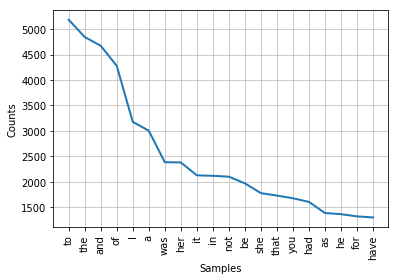

In [99]:
from nltk import Text
import matplotlib.pyplot as plt

text = Text(retokenize.tokenize(emma_raw))
text.plot(20)
plt.show()

In [100]:
text.concordance("Emma") # 단어가 쓰인 모든 문맥

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [101]:
text.similar("Emma") # 비슷한 환경

she he it i harriet you her jane him that me and all they them there
herself be isabella but


In [102]:
text.common_contexts(["Emma", "she"])

that_might moment_could that_would that_could which_could and_were
and_sat as_had that_should said_this and_felt dinner_found her_knew
and_hoped that_was and_and emma_is said_beginning but_could so_thought


# 단어 빈도수

In [103]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [104]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = nltk.tag.pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [105]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [106]:
fd_names.most_common(30)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208),
 ('Hartfield', 160),
 ('Oh', 156),
 ('Bates', 141),
 ('Highbury', 123),
 ('John', 90),
 ('Randalls', 89),
 ('Smith', 89),
 ('Martin', 85),
 ('Perry', 79),
 ('No', 79),
 ('A', 74),
 ('How', 69),
 ('Well', 69),
 ('My', 68),
 ('Isabella', 65),
 ('Cole', 61),
 ('Goddard', 59),
 ('Yes', 58),
 ('Campbell', 51),
 ('Donwell', 49)]

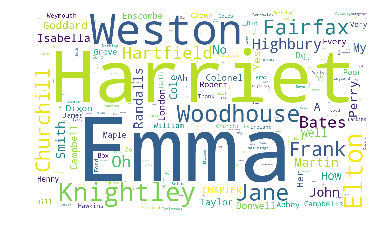

In [107]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()